In [1]:
import keras
from keras import backend as K
from keras import layers, regularizers, callbacks
from keras.models import load_model

import tensorflow as tf
import random

import numpy as np
import pandas as pd
from sklearn.metrics import multilabel_confusion_matrix, f1_score, recall_score, precision_score, accuracy_score, hamming_loss

import matplotlib.pyplot as plt
import seaborn as sns

Using TensorFlow backend.


In [2]:
version = 'v1'

# label load

In [3]:
train_X = pd.read_excel('./data/paper_train.xlsx')
train_X = train_X.drop(['Unnamed: 0', 'abstract'], axis=1)
train_X

,3D프린팅,4차산업,4차산업혁명,STEAM교육,가상현실,감성,감성분석,감정,강한인공지능,강화학습,...,핀테크,학습,학습동기,학습성과,학업성취도,합성곱신경망,핵심역량,헬스케어,혁신,협업
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2800,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2801,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2802,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2803,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
val_X = pd.read_excel('./data/paper_val.xlsx')
val_X = val_X.drop(['Unnamed: 0', 'abstract'], axis=1)
val_X

,3D프린팅,4차산업,4차산업혁명,STEAM교육,가상현실,감성,감성분석,감정,강한인공지능,강화학습,...,핀테크,학습,학습동기,학습성과,학업성취도,합성곱신경망,핵심역량,헬스케어,혁신,협업
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
931,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
932,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
933,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
test_X = pd.read_excel('./data/paper_test.xlsx')
test_X = test_X.drop(['Unnamed: 0', 'abstract'], axis=1)
test_X

,3D프린팅,4차산업,4차산업혁명,STEAM교육,가상현실,감성,감성분석,감정,강한인공지능,강화학습,...,핀테크,학습,학습동기,학습성과,학업성취도,합성곱신경망,핵심역량,헬스케어,혁신,협업
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
931,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
932,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
933,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
one_hot_train_labels = np.array(train_X)
one_hot_train_labels
print(one_hot_train_labels.shape)

one_hot_val_labels = np.array(val_X)
one_hot_val_labels
print(one_hot_val_labels.shape)

one_hot_test_labels = np.array(test_X)
one_hot_test_labels
print(one_hot_test_labels.shape)

(2805, 262)
(935, 262)
(935, 262)


# Residual autoencoder

In [7]:
encoding_dim = 2

### input ###
input_label = keras.Input(shape=(one_hot_train_labels.shape[1],))

### encoder 1 residual ###
encoded_1 = layers.Dense(256, activation='relu')(input_label)
encoded_2 = layers.Dense(128, activation='relu')(encoded_1)

residual_1 = layers.Dense(128)(input_label)
encoded_3 = layers.add([encoded_2, residual_1])
dropout_1 = layers.Dropout(0.2)(encoded_3)

### encoder 2 residual ###
encoded_4 = layers.Dense(64, activation='relu')(dropout_1)
encoded_5 = layers.Dense(32, activation='relu')(encoded_4)

residual_2 = layers.Dense(32)(dropout_1)
encoded_6 = layers.add([encoded_5, residual_2])
dropout_2 = layers.Dropout(0.2)(encoded_6)

### encoder 3 residual ###
encoded_7 = layers.Dense(16, activation='relu')(dropout_2)
encoded_8 = layers.Dense(8, activation='relu')(encoded_7)

residual_3 = layers.Dense(8)(dropout_2)
encoded_9 = layers.add([encoded_8, residual_3])


### latent space ###
latent_space = layers.Dense(encoding_dim, activation='relu')(encoded_9)


### decoder 1 residual ###
decoded_1 = layers.Dense(8, activation='relu')(latent_space)
decoded_2 = layers.Dense(16, activation='relu')(decoded_1)

residual_5 = layers.Dense(16)(latent_space)
decoded_3 = layers.add([decoded_2, residual_5])

### decoder 2 residual ###
decoded_4 = layers.Dense(32, activation='relu')(decoded_3)
decoded_5 = layers.Dense(64, activation='relu')(decoded_4)

residual_6 = layers.Dense(64)(decoded_3)
decoded_6 = layers.add([decoded_5, residual_6])

### decoder 3 residual ###
decoded_7 = layers.Dense(128, activation='relu')(decoded_6)
decoded_8 = layers.Dense(256, activation='relu')(decoded_7)

residual_7 = layers.Dense(256)(decoded_6)
decoded_9 = layers.add([decoded_8, residual_7])

### output ###
decoded_10 = layers.Dense(one_hot_train_labels.shape[1], activation='sigmoid')(decoded_9)



autoencoder = keras.Model(input_label, decoded_10)

autoencoder.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 262)          0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 256)          67328       input_1[0][0]                    
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 128)          32896       dense_1[0][0]                    
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 128)          33664       input_1[0][0]                    
____________________________________________________________________________________________

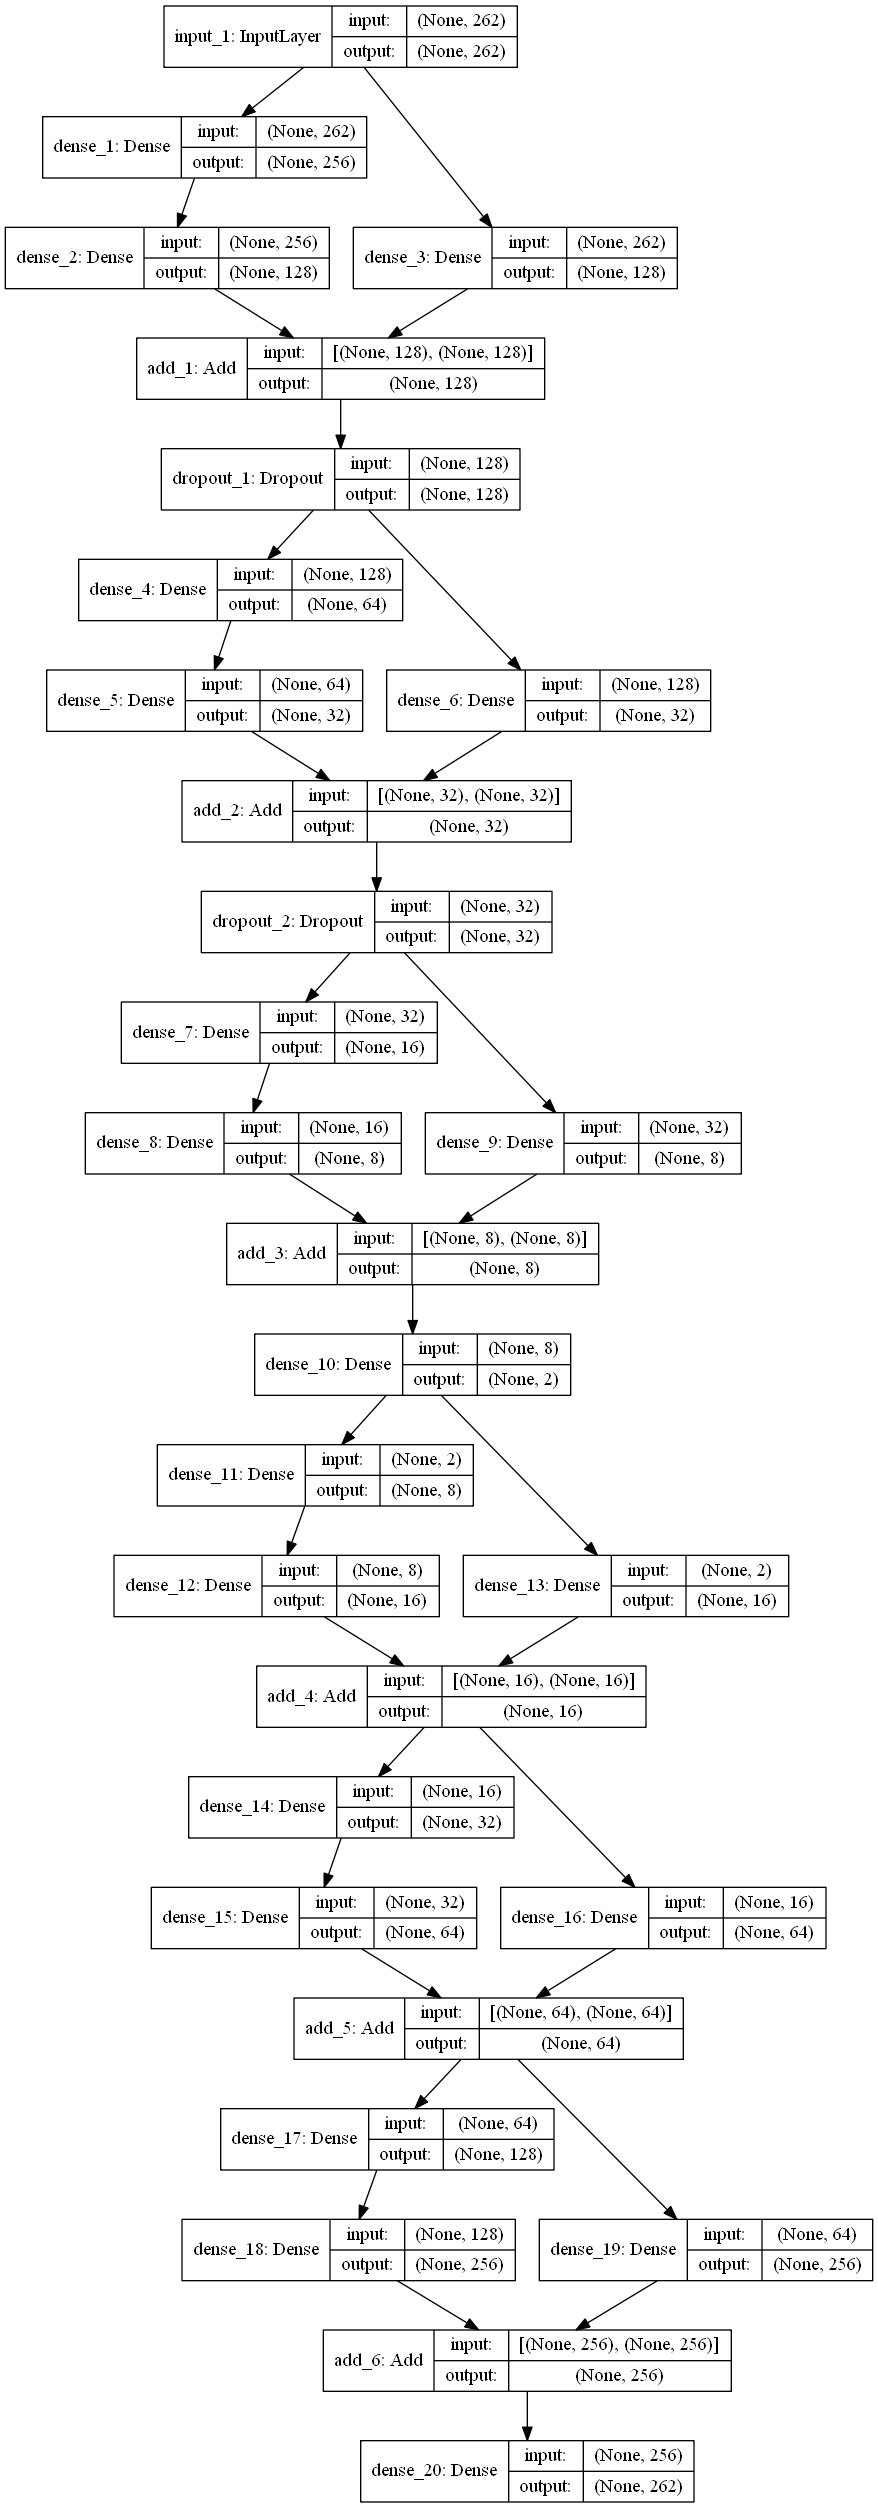

In [8]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

%matplotlib inline

SVG(model_to_dot(autoencoder, show_shapes=True, dpi=70).create(prog='dot', format='svg'))

plot_model(autoencoder, show_shapes=True, to_file='./img/Residual_AE_ls2_{}.png'.format(version))

In [9]:
encoder = keras.Model(input_label, latent_space)

encoder.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 262)          0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 256)          67328       input_1[0][0]                    
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 128)          32896       dense_1[0][0]                    
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 128)          33664       input_1[0][0]                    
____________________________________________________________________________________________

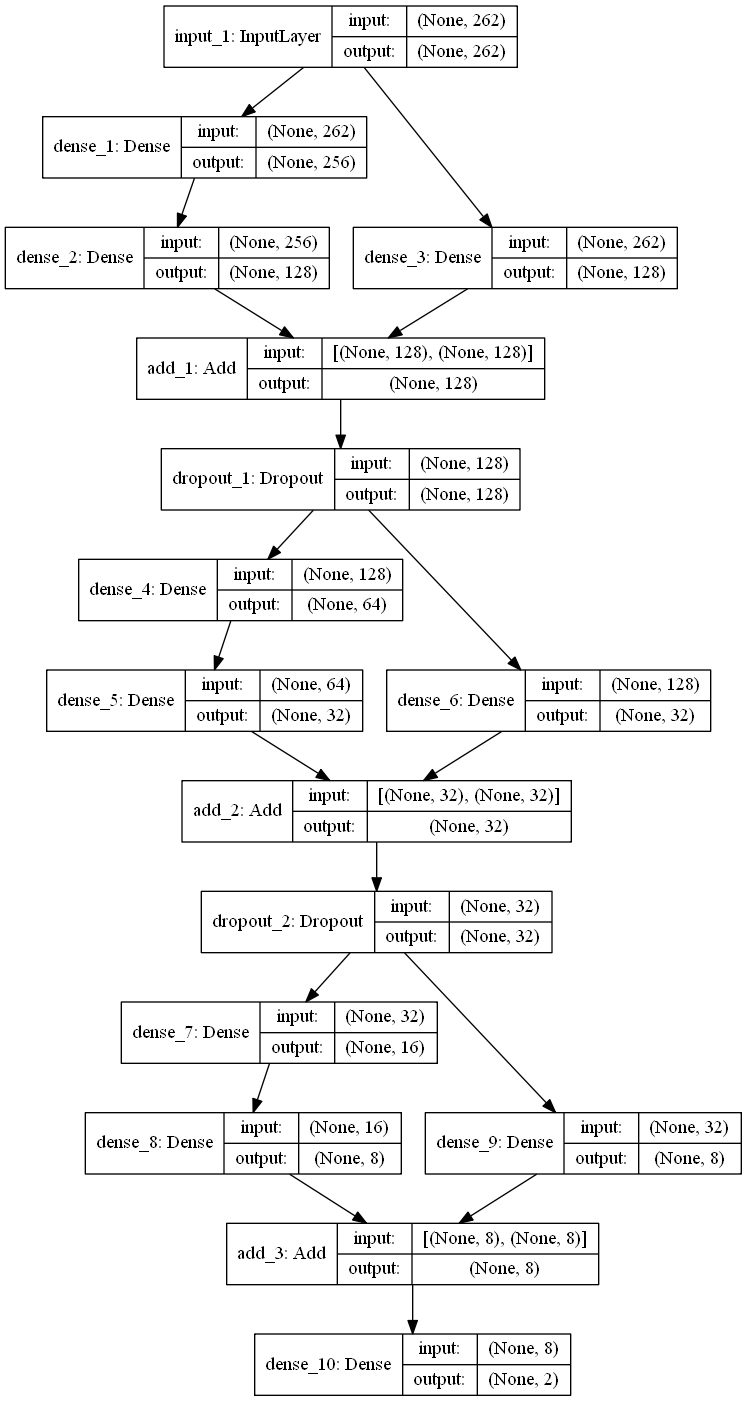

In [10]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

%matplotlib inline

SVG(model_to_dot(encoder, show_shapes=True, dpi=70).create(prog='dot', format='svg'))

plot_model(encoder, show_shapes=True, to_file='./img/Residual_Encoder_ls2_{}.png'.format(version))

In [11]:
### input ###
decoded_input = keras.Input(shape=(encoding_dim,))

### decoder 1 residual ###
decoder_layer1 = autoencoder.layers[-13](decoded_input)
decoder_layer2 = autoencoder.layers[-12](decoder_layer1)
decoder_residual1 = autoencoder.layers[-11](decoded_input)
decoder_layer3 = autoencoder.layers[-10]([decoder_layer2, decoder_residual1])

### decoder 2 residual ###
decoder_layer4 = autoencoder.layers[-9](decoder_layer3)
decoder_layer5 = autoencoder.layers[-8](decoder_layer4)
decoder_residual2 = autoencoder.layers[-7](decoder_layer3)
decoder_layer6 = autoencoder.layers[-6]([decoder_layer5, decoder_residual2])

### decoder 3 residual ###
decoder_layer7 = autoencoder.layers[-5](decoder_layer6)
decoder_layer8 = autoencoder.layers[-4](decoder_layer7)
decoder_residual3 = autoencoder.layers[-3](decoder_layer6)
decoder_layer9 = autoencoder.layers[-2]([decoder_layer8, decoder_residual3])

### output ###
decoder_layer10 = autoencoder.layers[-1](decoder_layer9)


decoder = keras.Model(decoded_input, decoder_layer10)

decoder.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 2)            0                                            
__________________________________________________________________________________________________
dense_11 (Dense)                (None, 8)            24          input_2[0][0]                    
__________________________________________________________________________________________________
dense_12 (Dense)                (None, 16)           144         dense_11[1][0]                   
__________________________________________________________________________________________________
dense_13 (Dense)                (None, 16)           48          input_2[0][0]                    
____________________________________________________________________________________________

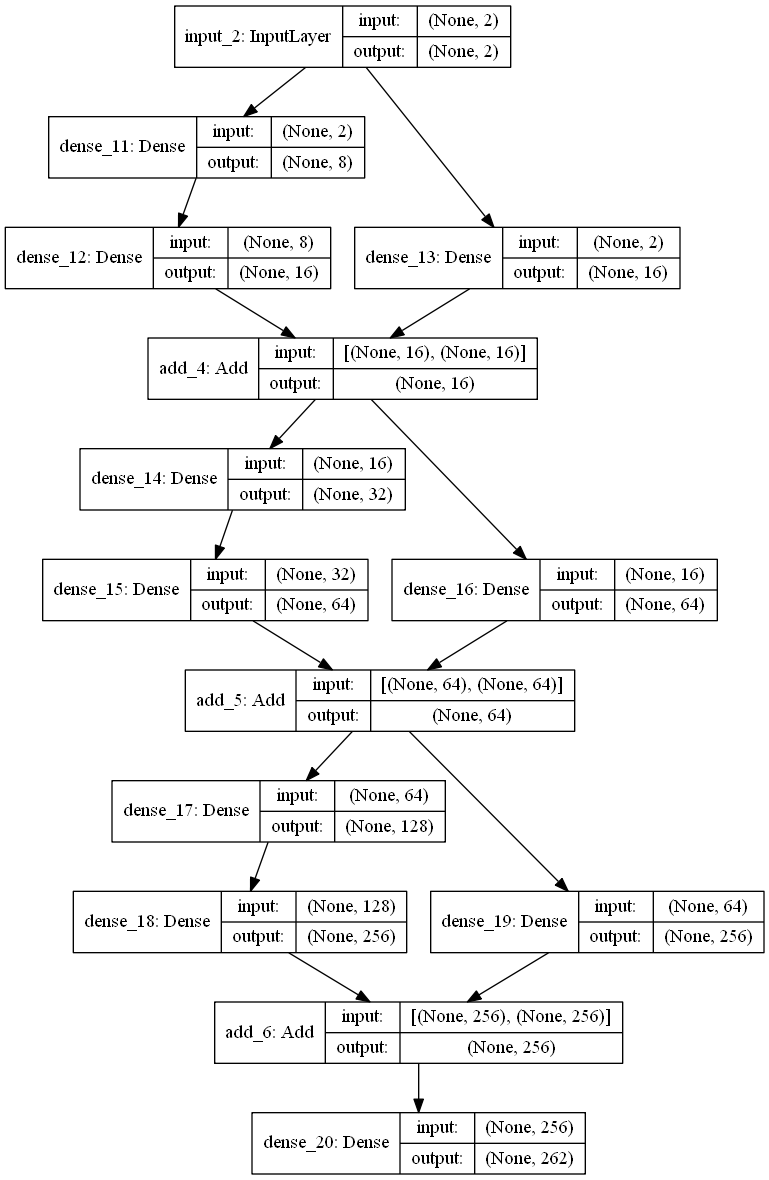

In [12]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

%matplotlib inline

SVG(model_to_dot(decoder, show_shapes=True, dpi=70).create(prog='dot', format='svg'))

plot_model(decoder, show_shapes=True, to_file='./img/Residual_Decoder_ls2_{}.png'.format(version))

In [13]:
optimizer = keras.optimizers.Adam(lr=0.001)

autoencoder.compile(loss=['binary_crossentropy'], optimizer=optimizer)
encoder.compile(loss=['binary_crossentropy'], optimizer=optimizer)
decoder.compile(loss=['binary_crossentropy'], optimizer=optimizer)

### 버전 체크

In [14]:
es = callbacks.EarlyStopping(monitor='val_loss', patience=5, mode='auto')

filename = './trained_model/RAE_ls2_{}'.format(version) + '-{epoch:02d}-{val_loss:.5f}.h5'
mc = callbacks.ModelCheckpoint(filename, monitor='val_loss', verbose=1, mode='auto')

In [15]:
history = autoencoder.fit(one_hot_train_labels,
                          one_hot_train_labels,
                          epochs=300,
                          batch_size=64,
                          validation_data=(one_hot_val_labels, one_hot_val_labels),
                          callbacks=[es, mc])

Train on 2805 samples, validate on 935 samples
Epoch 1/300
2805/2805 [==============================] - 1s 383us/step - loss: 0.1827 - val_loss: 0.0414

Epoch 00001: saving model to ./trained_model/RAE_ls2_v1-01-0.04137.h5
Epoch 2/300
2805/2805 [==============================] - 0s 128us/step - loss: 0.0378 - val_loss: 0.0346

Epoch 00002: saving model to ./trained_model/RAE_ls2_v1-02-0.03461.h5
Epoch 3/300
2805/2805 [==============================] - 0s 116us/step - loss: 0.0343 - val_loss: 0.0325

Epoch 00003: saving model to ./trained_model/RAE_ls2_v1-03-0.03249.h5
Epoch 4/300
2805/2805 [==============================] - 0s 125us/step - loss: 0.0323 - val_loss: 0.0311

Epoch 00004: saving model to ./trained_model/RAE_ls2_v1-04-0.03114.h5
Epoch 5/300
2805/2805 [==============================] - 0s 114us/step - loss: 0.0311 - val_loss: 0.0301

Epoch 00005: saving model to ./trained_model/RAE_ls2_v1-05-0.03014.h5
Epoch 6/300
2805/2805 [==============================] - 0s 112us/step - 

2805/2805 [==============================] - 0s 111us/step - loss: 0.0201 - val_loss: 0.0220

Epoch 00047: saving model to ./trained_model/RAE_ls2_v1-47-0.02195.h5
Epoch 48/300
2805/2805 [==============================] - 0s 117us/step - loss: 0.0200 - val_loss: 0.0218

Epoch 00048: saving model to ./trained_model/RAE_ls2_v1-48-0.02185.h5
Epoch 49/300
2805/2805 [==============================] - 0s 105us/step - loss: 0.0199 - val_loss: 0.0225

Epoch 00049: saving model to ./trained_model/RAE_ls2_v1-49-0.02248.h5
Epoch 50/300
2805/2805 [==============================] - 0s 119us/step - loss: 0.0198 - val_loss: 0.0218

Epoch 00050: saving model to ./trained_model/RAE_ls2_v1-50-0.02180.h5
Epoch 51/300
2805/2805 [==============================] - 0s 112us/step - loss: 0.0196 - val_loss: 0.0218

Epoch 00051: saving model to ./trained_model/RAE_ls2_v1-51-0.02183.h5
Epoch 52/300
2805/2805 [==============================] - 0s 114us/step - loss: 0.0194 - val_loss: 0.0217

Epoch 00052: saving m

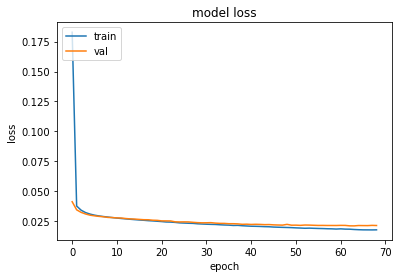

In [16]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [17]:
encoder.save('./trained_model/residual_encoder_ls2_{}.h5'.format(version))
decoder.save('./trained_model/residual_decoder_ls2_{}.h5'.format(version))

# inference

In [18]:
#one_hot_train_labels[0].shape[0]

In [19]:
encoded_values = encoder.predict(one_hot_test_labels)
encoded_values

array([[ 5.5504646, 13.180864 ],
       [10.809336 ,  4.68339  ],
       [ 1.6669487,  1.001017 ],
       ...,
       [ 0.8254343,  1.1601987],
       [ 1.2647678,  2.1540442],
       [ 3.0553372,  3.9034293]], dtype=float32)

In [20]:
b = pd.DataFrame(encoded_values)
b.describe()

,0,1
count,935.000000,935.000000
mean,3.336744,3.949698
std,2.758001,3.742265
min,0.000000,0.000000
25%,1.442665,1.380904
50%,2.464631,2.733631
75%,4.501404,4.743721
max,14.469755,14.269390


In [21]:
#b.to_excel('./Residual_AE_v10.xlsx')

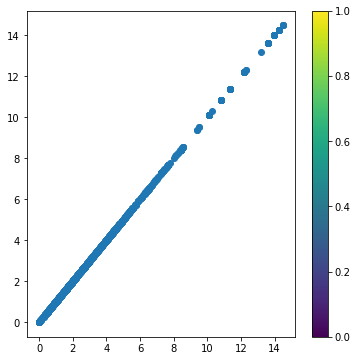

In [22]:
plt.figure(figsize=(6, 6))
plt.scatter(encoded_values[:, :], encoded_values[:, :])
plt.colorbar()
plt.show()

In [23]:
decoded_label = decoder.predict(encoded_values)
decoded_label

array([[9.11809252e-07, 7.63967805e-08, 9.90877211e-01, ...,
        6.23329925e-06, 1.81497886e-10, 3.77369967e-12],
       [2.81072764e-15, 2.50775497e-15, 8.53572334e-12, ...,
        1.36714533e-08, 4.07339203e-15, 4.89802189e-14],
       [6.66741116e-08, 1.05658124e-04, 2.66946117e-05, ...,
        2.73543783e-03, 1.10039207e-06, 5.06439901e-05],
       ...,
       [9.24942833e-06, 3.46124335e-03, 1.18719935e-01, ...,
        7.16619892e-04, 2.38649081e-04, 2.80263508e-03],
       [8.08062090e-04, 2.46519060e-03, 2.13971525e-01, ...,
        7.36240181e-04, 9.99514200e-03, 1.37667265e-02],
       [8.18567164e-03, 1.91921126e-02, 1.99801707e-05, ...,
        2.17169058e-02, 6.34020951e-04, 1.85257886e-04]], dtype=float32)

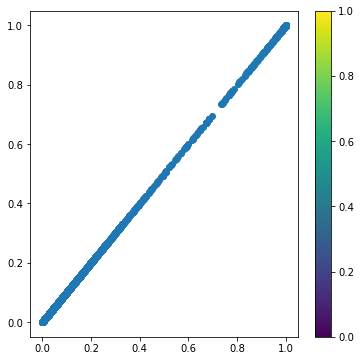

In [24]:
plt.figure(figsize=(6, 6))
plt.scatter(decoded_label[:, :], decoded_label[:, :])
plt.colorbar()
plt.show()

In [25]:
predicted_label = decoded_label.round()
predicted_label

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [26]:
"""predicted_label = np.where(decoded_label > 0.5, 1, 0)
predicted_label"""

'predicted_label = np.where(decoded_label > 0.5, 1, 0)\npredicted_label'

In [27]:
one_hot_test_labels

array([[0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [28]:
c_matrix = multilabel_confusion_matrix(one_hot_test_labels, predicted_label)

In [29]:
c_matrix.shape

(262, 2, 2)

In [30]:
c_matrix

array([[[933,   0],
        [  2,   0]],

       [[928,   0],
        [  7,   0]],

       [[873,   1],
        [ 25,  36]],

       ...,

       [[932,   0],
        [  3,   0]],

       [[934,   0],
        [  1,   0]],

       [[934,   0],
        [  1,   0]]], dtype=int64)

In [31]:
accuracy_score(one_hot_test_labels, predicted_label)

0.21497326203208555

In [32]:
precision_score(one_hot_test_labels, predicted_label, average='micro')

0.9590643274853801

In [33]:
recall_score(one_hot_test_labels, predicted_label, average='micro')

0.29620710415412405

In [34]:
f1_score(one_hot_test_labels, predicted_label, average='micro')

0.45262189512419504

In [35]:
hamming_loss(one_hot_test_labels, predicted_label)

0.004857737682165163

In [36]:
"""labels = ["".join("c" + str(i)) for i in range(1, 21)]
labels"""

'labels = ["".join("c" + str(i)) for i in range(1, 21)]\nlabels'

In [37]:
"""import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def print_confusion_matrix(confusion_matrix, axes, class_label, class_names, fontsize=12):

    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names,
    )

    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d", cbar=False, ax=axes)
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    axes.set_xlabel('True label')
    axes.set_ylabel('Predicted label')
    axes.set_title("Confusion Matrix for the class - " + class_label)"""

'import pandas as pd\nimport matplotlib.pyplot as plt\nimport seaborn as sns\n\ndef print_confusion_matrix(confusion_matrix, axes, class_label, class_names, fontsize=12):\n\n    df_cm = pd.DataFrame(\n        confusion_matrix, index=class_names, columns=class_names,\n    )\n\n    try:\n        heatmap = sns.heatmap(df_cm, annot=True, fmt="d", cbar=False, ax=axes)\n    except ValueError:\n        raise ValueError("Confusion matrix values must be integers.")\n    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha=\'right\', fontsize=fontsize)\n    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha=\'right\', fontsize=fontsize)\n    axes.set_xlabel(\'True label\')\n    axes.set_ylabel(\'Predicted label\')\n    axes.set_title("Confusion Matrix for the class - " + class_label)'

In [38]:
"""fig, ax = plt.subplots(5, 4, figsize=(12, 12))
    
for axes, cfs_matrix, label in zip(ax.flatten(), c_matrix, labels):
    print_confusion_matrix(cfs_matrix, axes, label, ["Y", "N"])
    
fig.tight_layout()
plt.show()"""

'fig, ax = plt.subplots(5, 4, figsize=(12, 12))\n    \nfor axes, cfs_matrix, label in zip(ax.flatten(), c_matrix, labels):\n    print_confusion_matrix(cfs_matrix, axes, label, ["Y", "N"])\n    \nfig.tight_layout()\nplt.show()'